In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import matplotlib.dates as dates
import datetime
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('multipage.pdf')
%matplotlib inline

In [2]:
df_2016 = pd.read_csv('../2016_df.csv', parse_dates='Created_Date')
df_2015 = pd.read_csv('../2015_df.csv', parse_dates='Created_Date')
df_2014 = pd.read_csv('../2014_df.csv', parse_dates='Created_Date')

In [3]:
df_2014['day'] = df_2014.index
df_2015['day'] = df_2015.index
df_2016['day'] = df_2016.index

In [4]:
df_2014 = df_2014.set_index('Created_Date')
df_2015 = df_2015.set_index('Created_Date')
#df_2016 = df_2016.set_index('Created_Date')
df_2016 = df_2016[df_2016['Created_Date'] != '2016-02-29']

In [5]:
df_2016 = df_2016.replace(to_replace="-", value=0)

In [6]:
train_years = pd.concat([df_2014, df_2015])

In [7]:
df_weather = pd.get_dummies(train_years['Weather'])

In [8]:
train_years = pd.concat([train_years, df_weather],axis=1,join='inner')

In [9]:
train_years.drop('Weather', axis=1, inplace=True)

In [10]:
complaint_type = ['Building_Conditions', 'Living_Conditions',
                 'General_Request', 'Parking_Enforcement', 
                 'Signal_Sign_Repair', 'Street_Sidewalk_Repair']

weather_types = ['Building_Conditions', 'Max_TempF', 'Fog', 'Fog-Rain', 'Fog-Rain-Snow', 
                 'Fog-Rain-Thunderstorm', 'Fog-Snow',
                 'Rain', 'Rain-Snow',
                 'Rain-Snow-Thunderstorm', 'Rain-Thunderstorm',
                 'Snow', 'Sunny']

feature_cols = ['Building_Conditions', 
                'General_Request', 'Parking_Enforcement', 
                'Signal_Sign_Repair', 'Street_Sidewalk_Repair',
                'Max_TempF', 'day',
                'Fog', 'Fog-Rain',
                'Fog-Rain-Snow', 
                'Fog-Rain-Thunderstorm', 'Fog-Snow',
                'Rain', 'Rain-Snow',
                'Rain-Snow-Thunderstorm', 'Rain-Thunderstorm',
                'Snow', 'Sunny']

X = train_years[complaint_type]
y = train_years.Max_TempF

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

In [12]:
clf = LogisticRegression()

In [13]:
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
clf.predict(X[:356])

array([30, 24, 24, 27, 32, 35, 20, 33, 35, 35, 40, 44, 35, 70, 35, 70, 35,
       59, 33, 61, 35, 18, 20, 24, 30, 30, 35, 35, 35, 35, 33, 59, 65, 35,
       35, 35, 32, 32, 30, 30, 29, 29, 29, 51, 44, 30, 30, 32, 29, 44, 32,
       32, 90, 32, 35, 26, 35, 35, 35, 36, 43, 35, 29, 35, 40, 44, 44, 45,
       70, 63, 48, 41, 41, 59, 45, 48, 41, 41, 48, 41, 54, 61, 48, 48, 48,
       48, 63, 59, 46, 41, 50, 48, 62, 41, 54, 65, 48, 71, 62, 69, 85, 70,
       80, 82, 48, 41, 48, 61, 68, 64, 69, 71, 62, 45, 66, 70, 70, 71, 48,
       48, 82, 82, 75, 75, 69, 79, 79, 85, 69, 72, 77, 82, 82, 82, 85, 85,
       79, 79, 85, 69, 79, 79, 79, 70, 77, 77, 85, 82, 85, 82, 79, 79, 82,
       82, 82, 82, 79, 79, 77, 85, 85, 71, 70, 79, 86, 77, 85, 82, 82, 85,
       85, 79, 86, 84, 79, 82, 85, 79, 79, 77, 52, 82, 85, 85, 85, 86, 82,
       85, 86, 95, 85, 82, 86, 86, 82, 85, 85, 79, 85, 79, 79, 85, 84, 85,
       85, 85, 86, 86, 82, 79, 79, 79, 85, 80, 80, 85, 80, 79, 82, 79, 79,
       79, 82, 85, 85, 79

In [15]:
df_pred = pd.DataFrame({'pred':clf.predict(X_test),'actual':y_test})

In [16]:
df_pred.sort_index(axis=0, inplace=True)

## 2014 Predicted Temperatures vs. Actual by Building Complaint

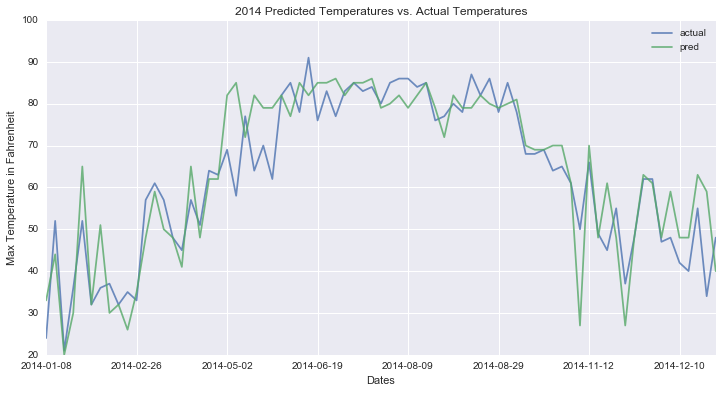

In [17]:
df_pred[pd.to_datetime(df_pred.index).year==2014].plot(kind='line', figsize=(12,6),alpha=.8)
plt.title('2014 Predicted Temperatures vs. Actual Temperatures')
plt.xlabel('Dates')
plt.ylabel('Max Temperature in Fahrenheit')
plt.savefig('2014_weather.pdf', format='pdf')

## 2015 Predicted Temperatures vs. Actual Temperatures

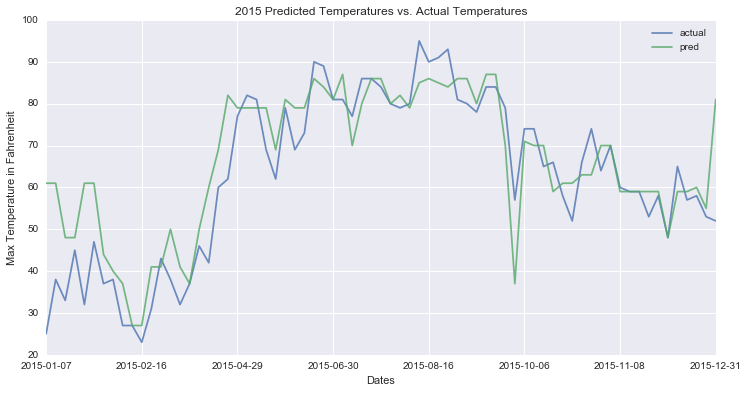

In [18]:
df_pred[pd.to_datetime(df_pred.index).year==2015].plot(kind='line', figsize=(12,6),alpha=.8)
plt.title('2015 Predicted Temperatures vs. Actual Temperatures')
plt.xlabel('Dates')
plt.ylabel('Max Temperature in Fahrenheit')
plt.savefig('2015_weather.pdf', format='pdf')

In [300]:
plt.savefig??